In [61]:
import numpy as np
import os
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import metrics
import warnings

import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree
import numpy as np 
import pandas as pd 
import seaborn as sns # viz
import matplotlib.pyplot as plt # viz
from scipy import stats
import json
from typing import List, Tuple
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model

import warnings
warnings.filterwarnings('ignore')


# Import Whole Usable Dataset Preprocessed

In [62]:
print(os.getcwd())
relative_path = os.path.abspath(os.path.join(os.getcwd(), "../"))
df = pd.read_csv(relative_path+'/preprocessed_data/non_split_dataset/total_subset.csv')
# df = df.drop(columns='evil')



a:\Desktop\FYP Final Files\Analysis Notebooks


In [63]:
df.head()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,evil,sus
0,1,0,0,1,157,5,0,0,1
1,1,0,0,1,3,1,0,0,1
2,1,0,0,1,1010,0,0,0,1
3,1,1,0,0,21,2,2,0,1
4,1,1,0,0,1005,4,0,0,1


# Analysis

In [64]:
print(df['sus'].value_counts())
print('\n')
print('\n')
print(df['sus'].value_counts(normalize=True))

sus
0    967564
1    173514
Name: count, dtype: int64




sus
0    0.847939
1    0.152061
Name: proportion, dtype: float64


Check for nulls, pretty standard

In [65]:
df[df.columns].isnull().sum()

processId          0
parentProcessId    0
userId             0
mountNamespace     0
eventId            0
argsNum            0
returnValue        0
evil               0
sus                0
dtype: int64

Lets get a quick look at what columns we are dealing with

In [66]:
df.head()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,evil,sus
0,1,0,0,1,157,5,0,0,1
1,1,0,0,1,3,1,0,0,1
2,1,0,0,1,1010,0,0,0,1
3,1,1,0,0,21,2,2,0,1
4,1,1,0,0,1005,4,0,0,1


Lets look at distribution

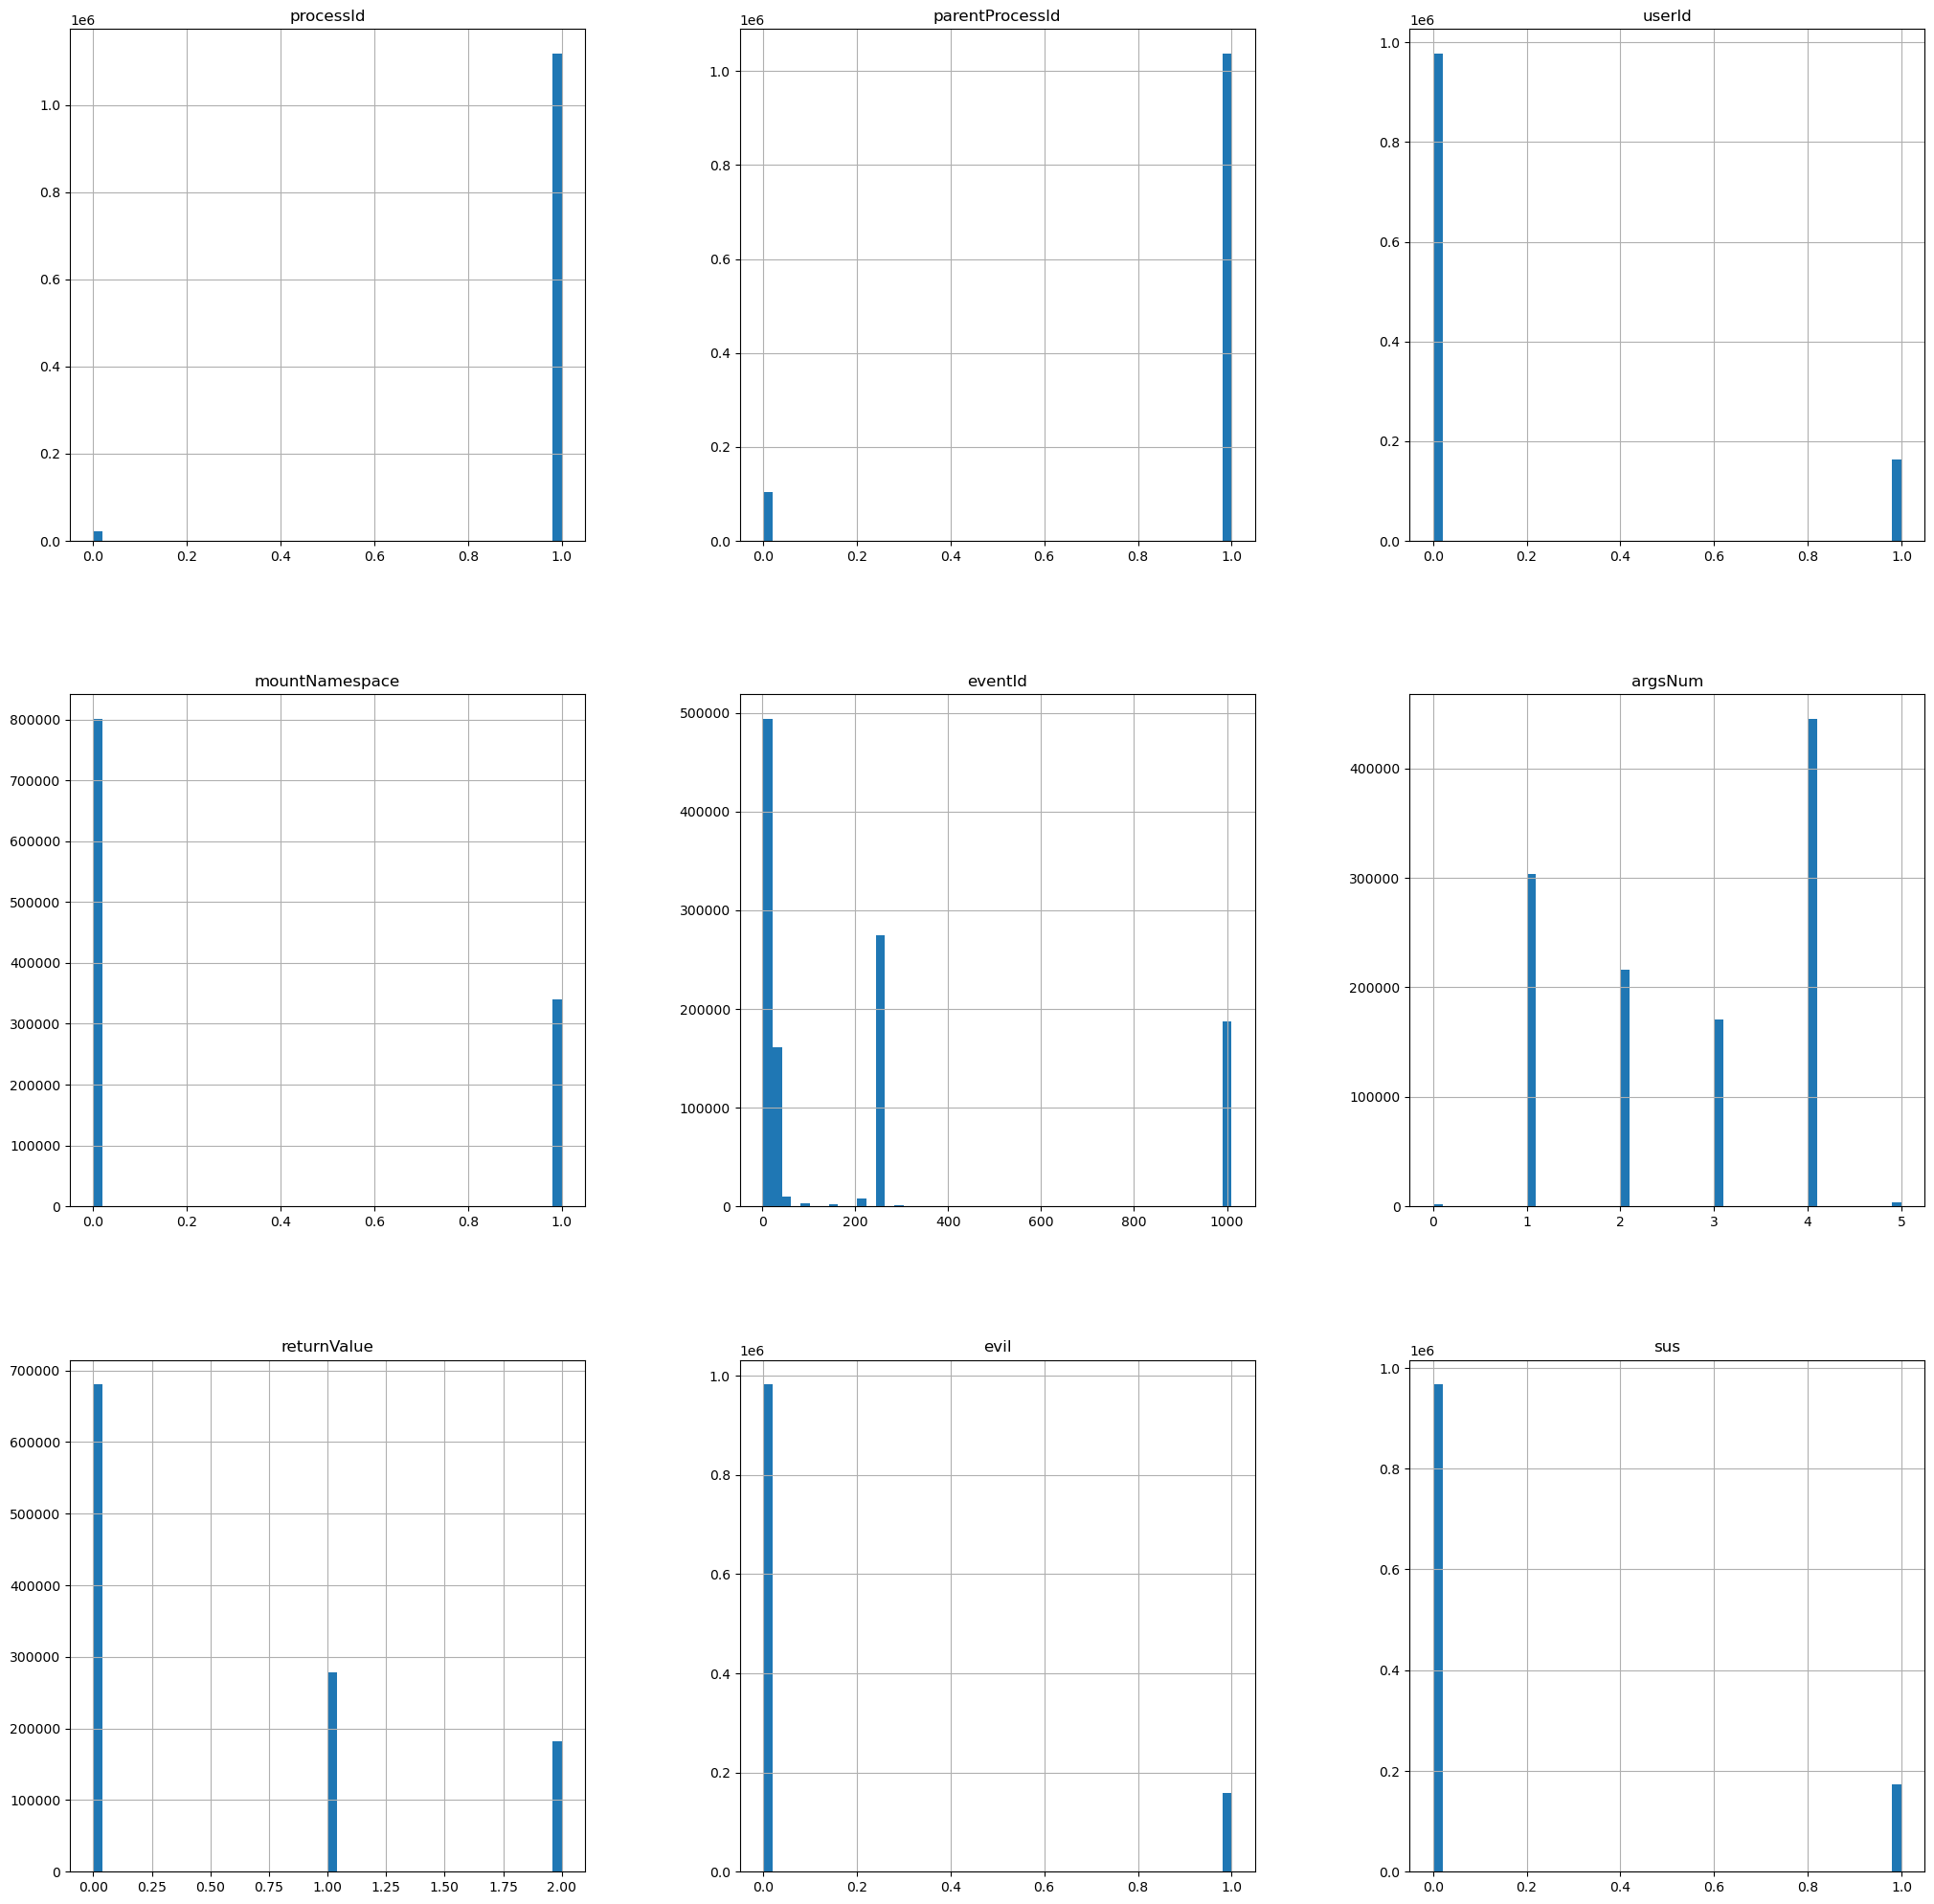

In [67]:
df.hist(bins = 50, figsize = (25,25))
plt.show()

In [68]:
benign = df.loc[df['sus'] == 0, :]
benign.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,evil,sus
count,967564.000000,967564.000000,967564.0,967564.000000,967564.000000,967564.000000,967564.000000,967564.0,967564.0
mean,0.976268,0.898877,0.0,0.351300,267.621529,2.627771,0.350763,0.0,0.0
std,0.152212,0.301492,0.0,0.477377,371.916479,1.334452,0.545898,0.0,0.0
min,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.0,0.0
25%,1.000000,1.000000,0.0,0.000000,3.000000,1.000000,0.000000,0.0,0.0
50%,1.000000,1.000000,0.0,0.000000,41.000000,2.000000,0.000000,0.0,0.0
75%,1.000000,1.000000,0.0,1.000000,257.000000,4.000000,1.000000,0.0,0.0
max,1.000000,1.000000,0.0,1.000000,1010.000000,5.000000,2.000000,0.0,0.0


In [69]:
evil = df.loc[df['sus'] == 1, :]
evil.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,evil,sus
count,173514.0,173514.000000,173514.000000,173514.000000,173514.000000,173514.000000,173514.000000,173514.000000,173514.0
mean,1.0,0.967334,0.939544,0.000207,68.203056,2.915719,1.744194,0.913079,1.0
std,0.0,0.177761,0.238331,0.014403,151.489930,0.530629,0.635703,0.281720,0.0
min,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0
25%,1.0,1.000000,1.000000,0.000000,42.000000,3.000000,2.000000,1.000000,1.0
50%,1.0,1.000000,1.000000,0.000000,42.000000,3.000000,2.000000,1.000000,1.0
75%,1.0,1.000000,1.000000,0.000000,42.000000,3.000000,2.000000,1.000000,1.0
max,1.0,1.000000,1.000000,1.000000,1010.000000,5.000000,2.000000,1.000000,1.0


Lets see the overlap

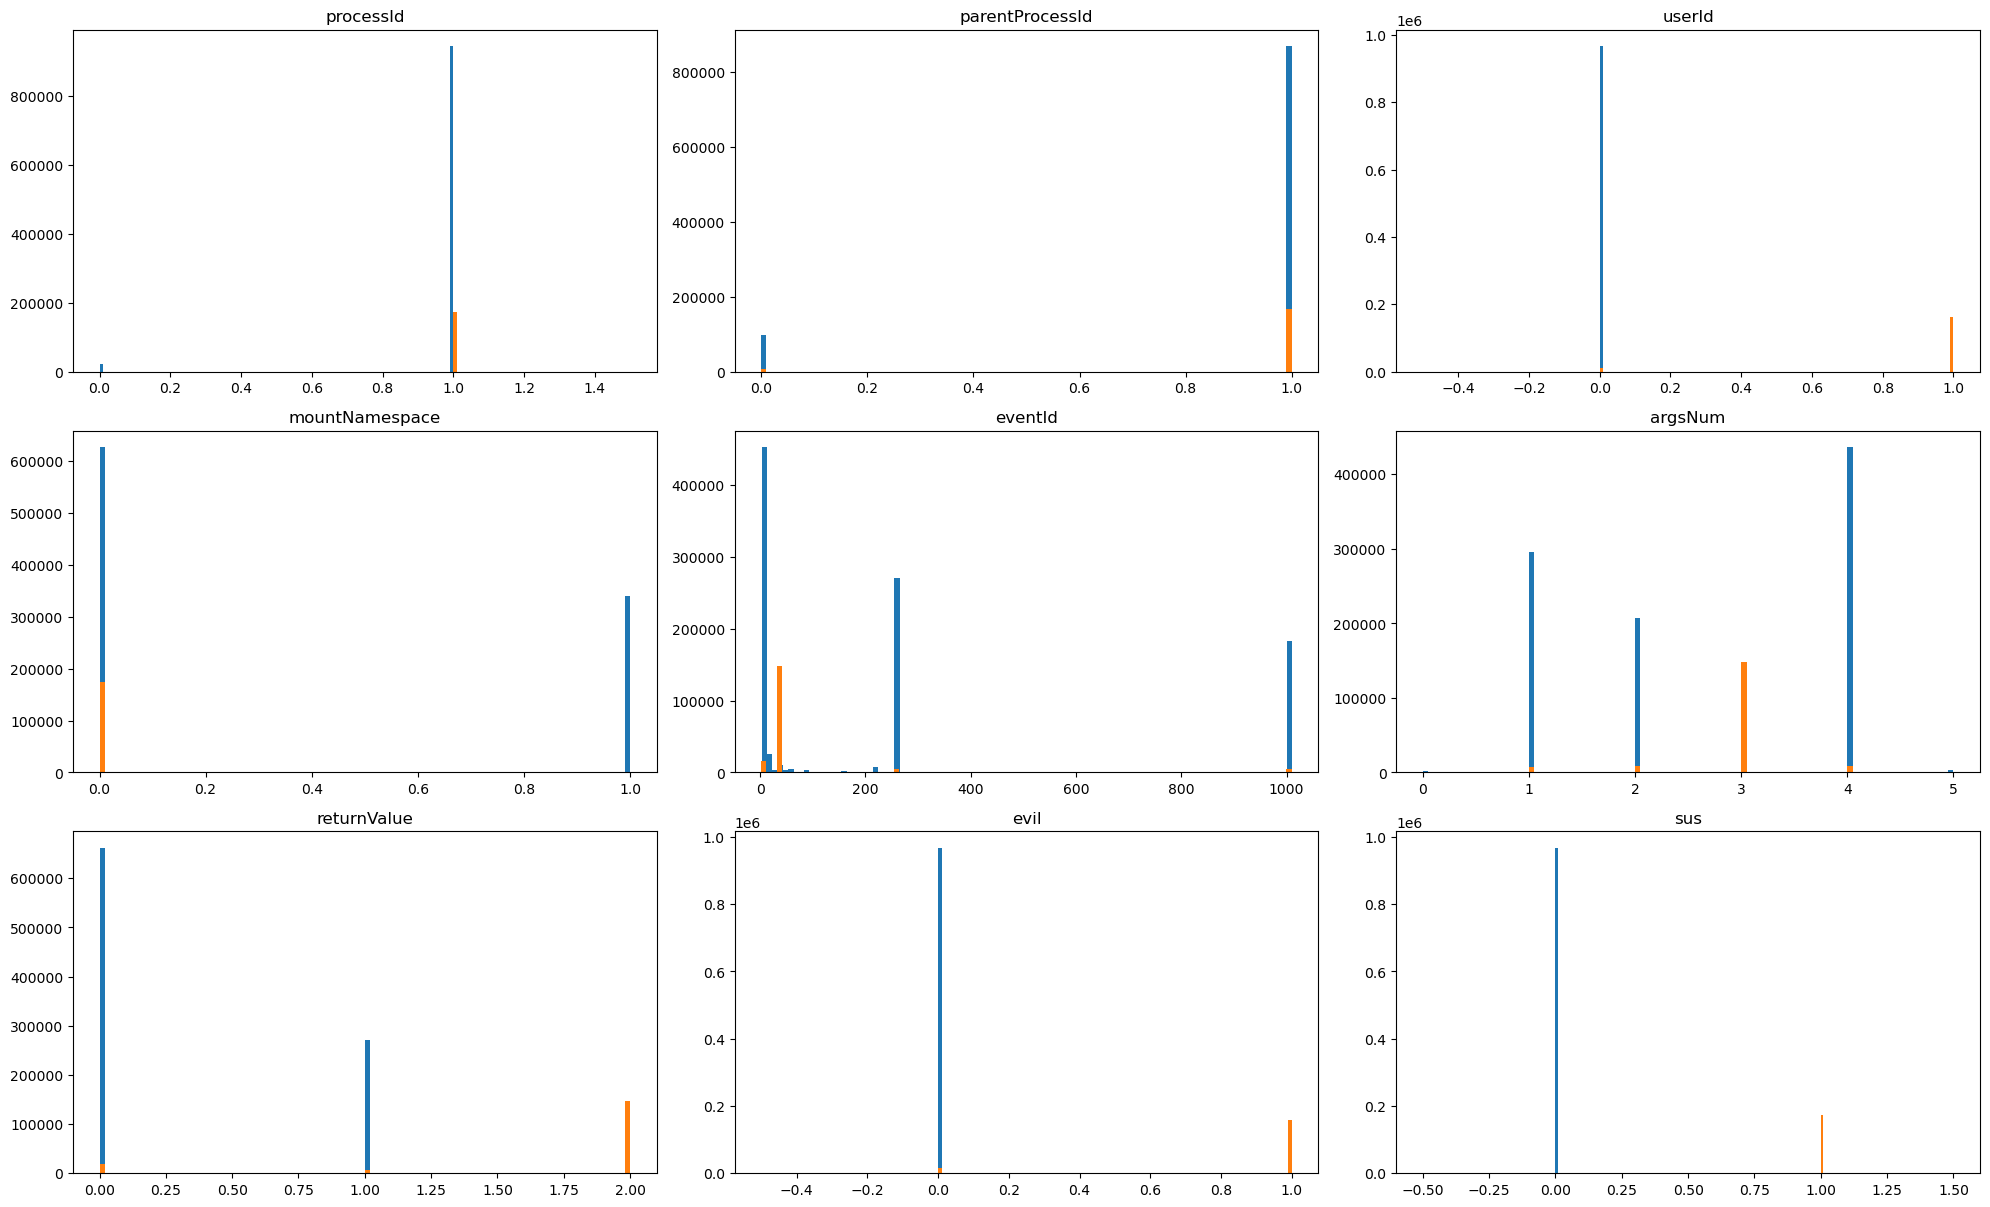

In [88]:
plt.figure(figsize=(20,40))
num=1
for col in benign.columns:
    plt.subplot(10,3,num)
    plt.hist(benign[col], bins = 100)
    plt.hist(evil[col],bins = 100)
    plt.title(col)
    num=num+1
plt.tight_layout()
plt.show()

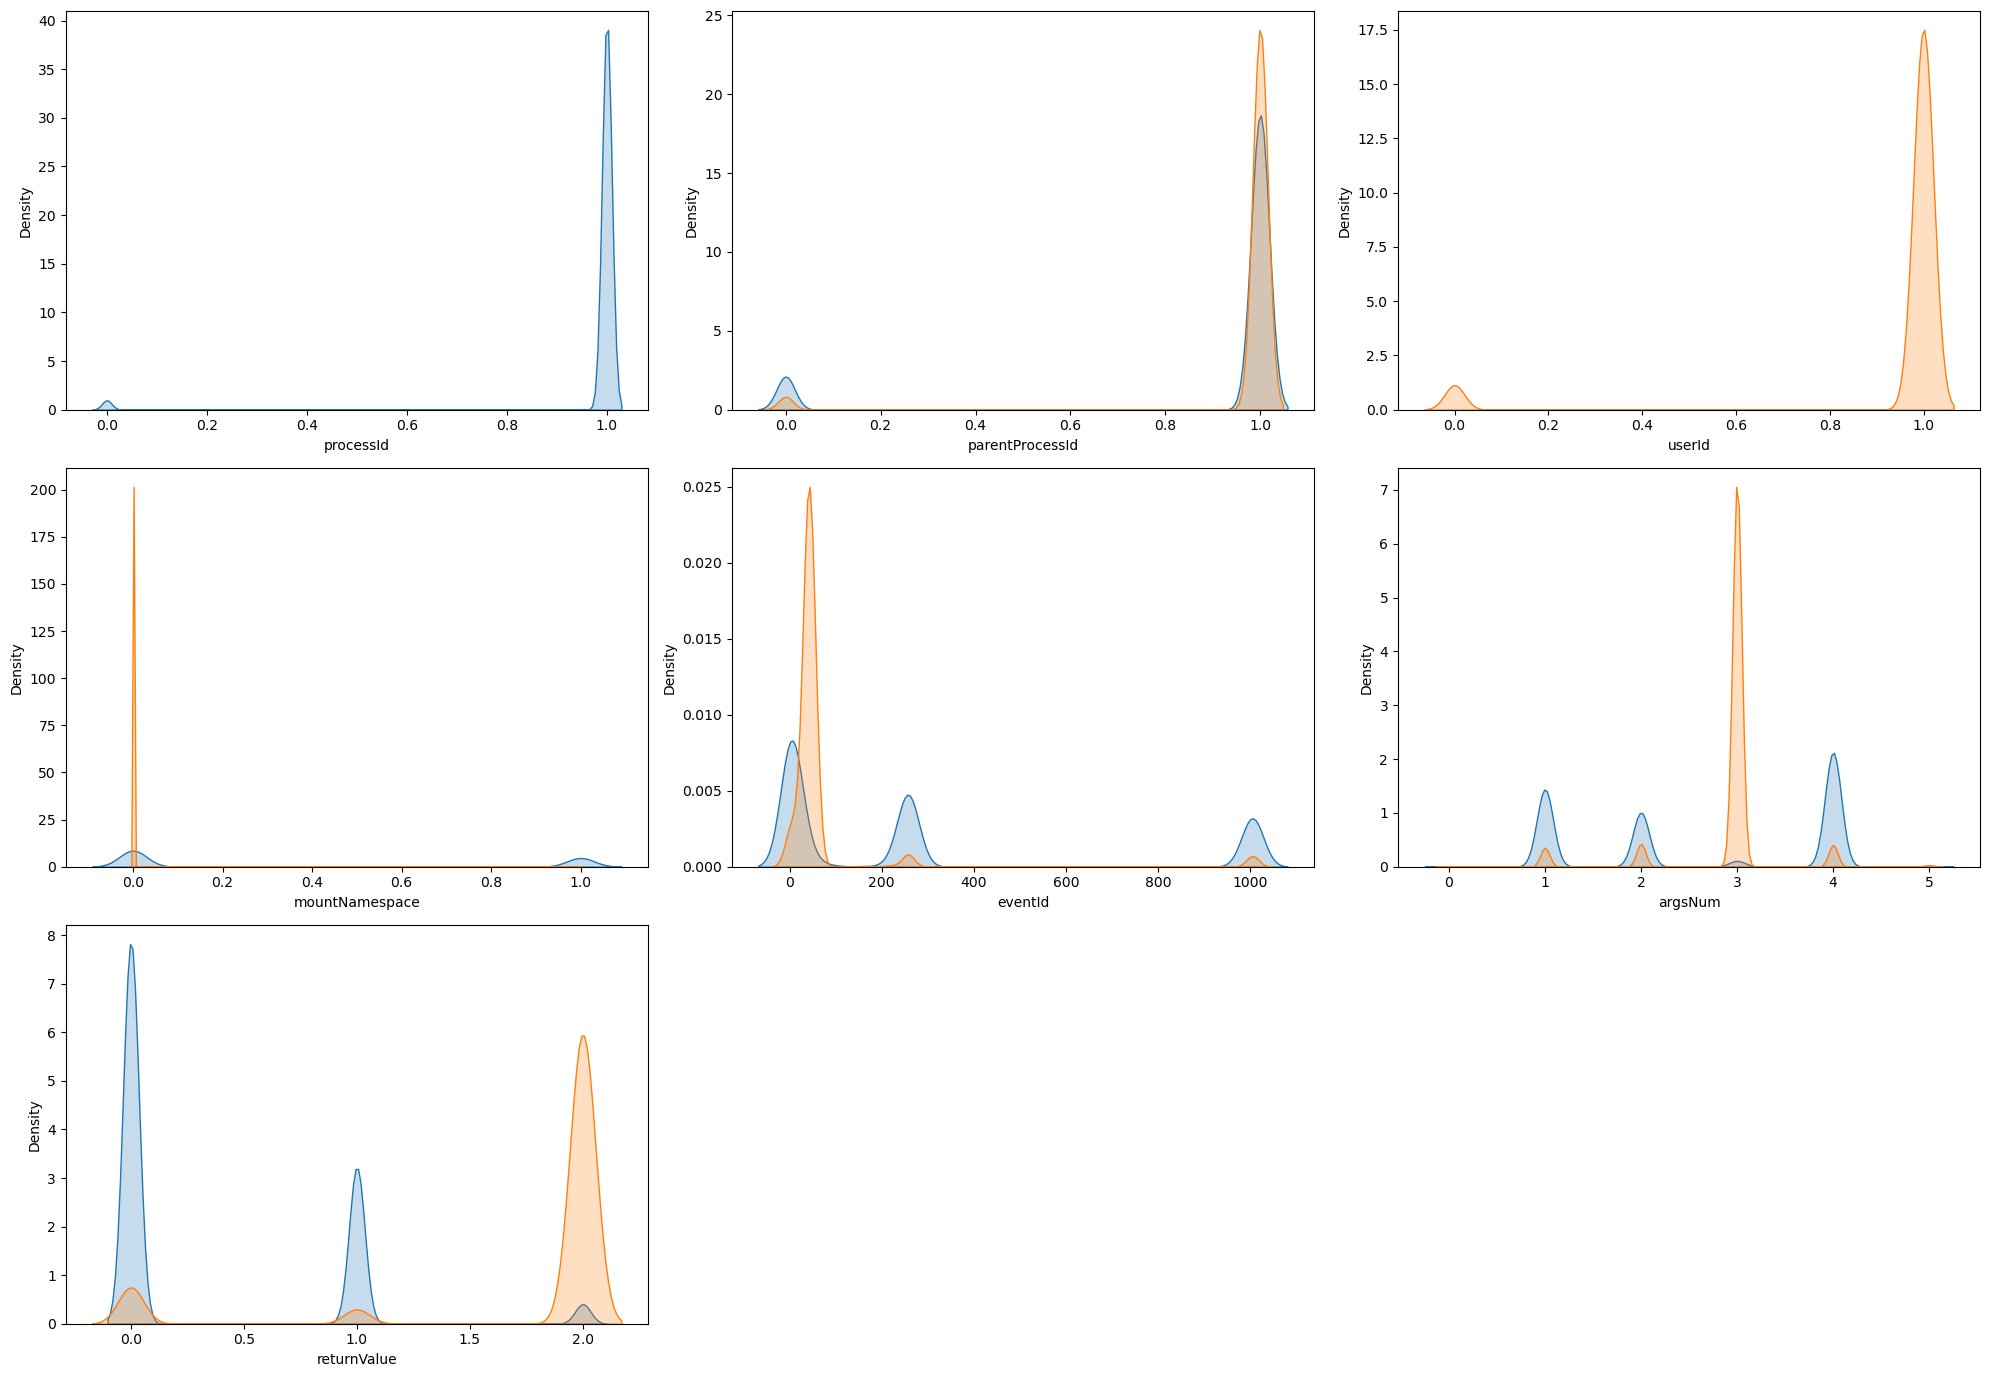

In [71]:
features = df.columns[:-2]

plt.figure(figsize=(20,50))
num=1
for feature in features:
    plt.subplot(11,3,num)
    sns.kdeplot(benign[feature], shade= True)
    sns.kdeplot(evil[feature], shade= True)
    num=num+1
    plt.tight_layout()
plt.show()

Lets look at the frequency of our target features

<Axes: title={'center': 'Label Frequency for evil label in Dataset'}, xlabel='evil'>

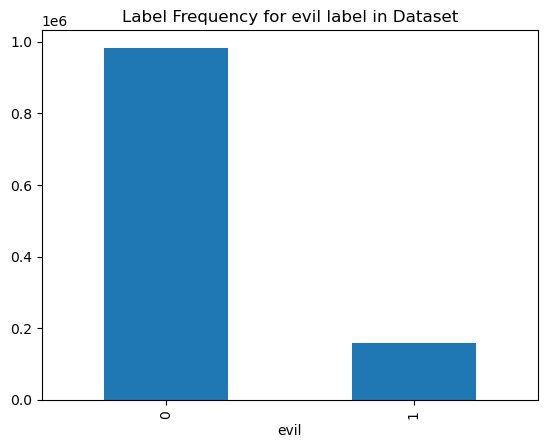

In [72]:
df.evil.value_counts().plot(kind='bar', title='Label Frequency for evil label in Dataset')

In [73]:
df.groupby(['sus'])[['argsNum']].count()

,argsNum
sus,
0,967564
1,173514


<Axes: title={'center': 'Label Frequency for sus label in Dataset'}, xlabel='sus'>

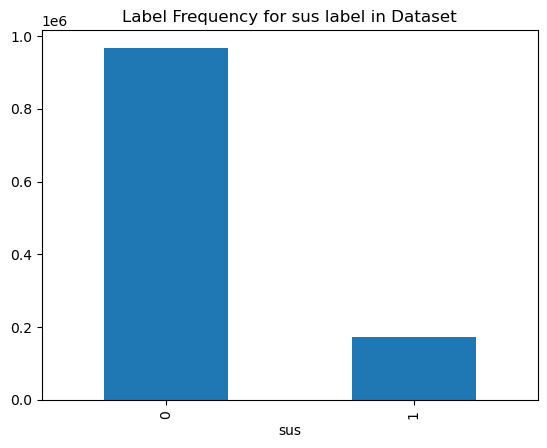

In [74]:
df.sus.value_counts().plot(kind='bar', title='Label Frequency for sus label in Dataset')

In [75]:
df.groupby(['sus'])[['argsNum']].count()

,argsNum
sus,
0,967564
1,173514


In [76]:
df.groupby(['sus','evil'])[['argsNum']].count()

argsNum
sus evil         
0   0      967564
1   0       15082
    1      158432

Lets explore feature correlation

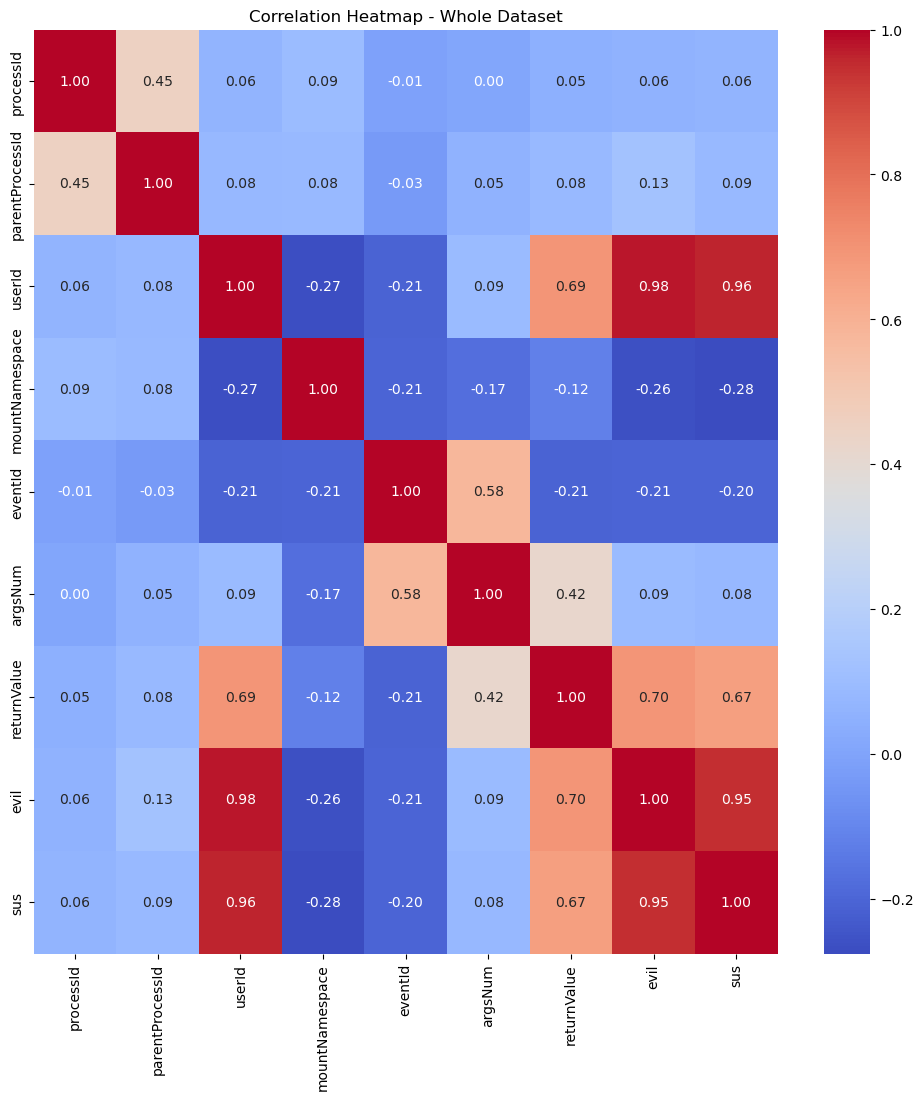

In [77]:
numeric_data = df.select_dtypes(include=['number'])
corr = numeric_data.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Whole Dataset')
plt.show()


In [78]:
highest_correlation = corr.unstack().sort_values(ascending=False)
highest_correlation = highest_correlation[highest_correlation != 1.0].drop_duplicates()
print("Highest correlation values in whole dataset:")
print(highest_correlation.head(50))


Highest correlation values in whole dataset:
evil             userId            0.975275
sus              userId            0.964089
evil             sus               0.948190
returnValue      evil              0.695673
                 userId            0.693171
sus              returnValue       0.665959
eventId          argsNum           0.578328
parentProcessId  processId         0.453708
argsNum          returnValue       0.420591
parentProcessId  evil              0.126667
mountNamespace   processId         0.093349
argsNum          evil              0.092218
userId           argsNum           0.088686
parentProcessId  sus               0.085590
                 returnValue       0.083913
                 mountNamespace    0.083428
argsNum          sus               0.082691
parentProcessId  userId            0.081246
sus              processId         0.060686
userId           processId         0.058507
processId        evil              0.057542
parentProcessId  argsNum       

Entropy Analysis

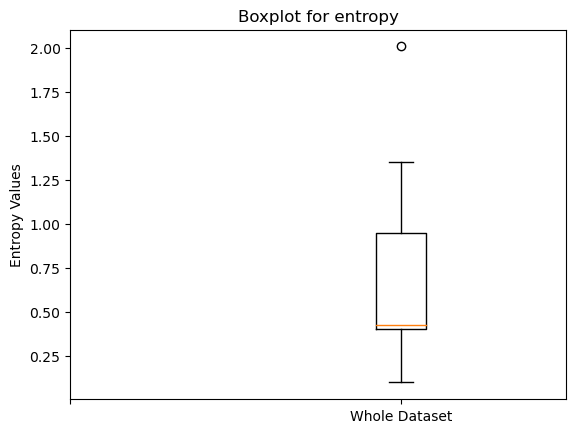

In [79]:
dataset = [df]
entropy_vals = []
for data in dataset:
    dataset_entropy_vals = []
    for featureX in data.columns:
        if featureX == 'timestamp':
            pass
        else:
            counts = data[featureX].value_counts()
            feat_entropy = stats.entropy(counts)
            dataset_entropy_vals.append(feat_entropy)
            
    entropy_vals.append(dataset_entropy_vals)

plt.boxplot(entropy_vals)
plt.title('Boxplot for entropy')
plt.ylabel("Entropy Values")
plt.xticks([1,0],labels=['Whole Dataset',''])
plt.show()

Variation

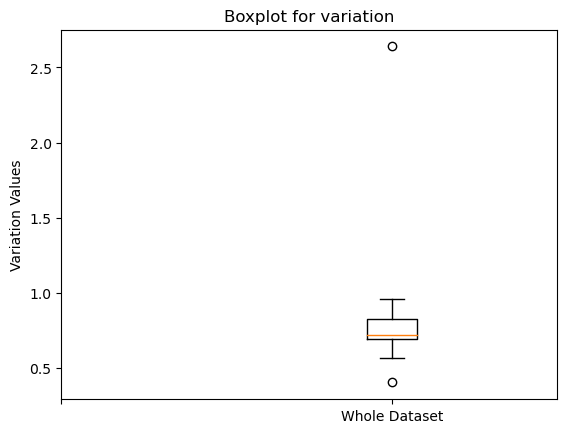

In [80]:
dataset = [df]
variation_vals = []
for data in dataset:
    dataset_var_vals = []
    for featureX in data.columns:
        if featureX == 'timestamp':
            pass
        else:
            counts = data[featureX].value_counts()
            feat_var = stats.variation(counts)
            dataset_var_vals.append(feat_var)
            
    variation_vals.append(dataset_var_vals)

plt.boxplot(variation_vals)
plt.title('Boxplot for variation')
plt.ylabel("Variation Values")
plt.xticks([1,0],labels=['Whole Dataset',''])
plt.show()